In [1]:
%matplotlib inline

import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import pandas as pd
import os

In [2]:
# Use the torchvision's implementation of ResNeXt, but add FC layer for a different number of classes (27) and a Sigmoid instead of a default Softmax.
class Resnext50(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        resnet = models.resnext50_32x4d(pretrained=False)
        resnet.fc = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=resnet.fc.in_features, out_features=n_classes)
        )
        self.base_model = resnet
        self.sigm = nn.Sigmoid()

    def forward(self, x):
        return self.base_model(x)

Загрузка весов:

In [3]:
# Initialize the model
model = Resnext50(7)
# Switch model to the training mode
model.eval()
model.load_state_dict(torch.load('strawdisease.pt'))

<All keys matched successfully>

Прогоняем модели:

In [4]:
classes = ['angular_leafspot', 'anthracnose_fruit_rot', 'blossom_blight', 'gray_mold', 
           'leaf_spot', 'powdery_mildew_fruit', 'powdery_mildew_leaf']

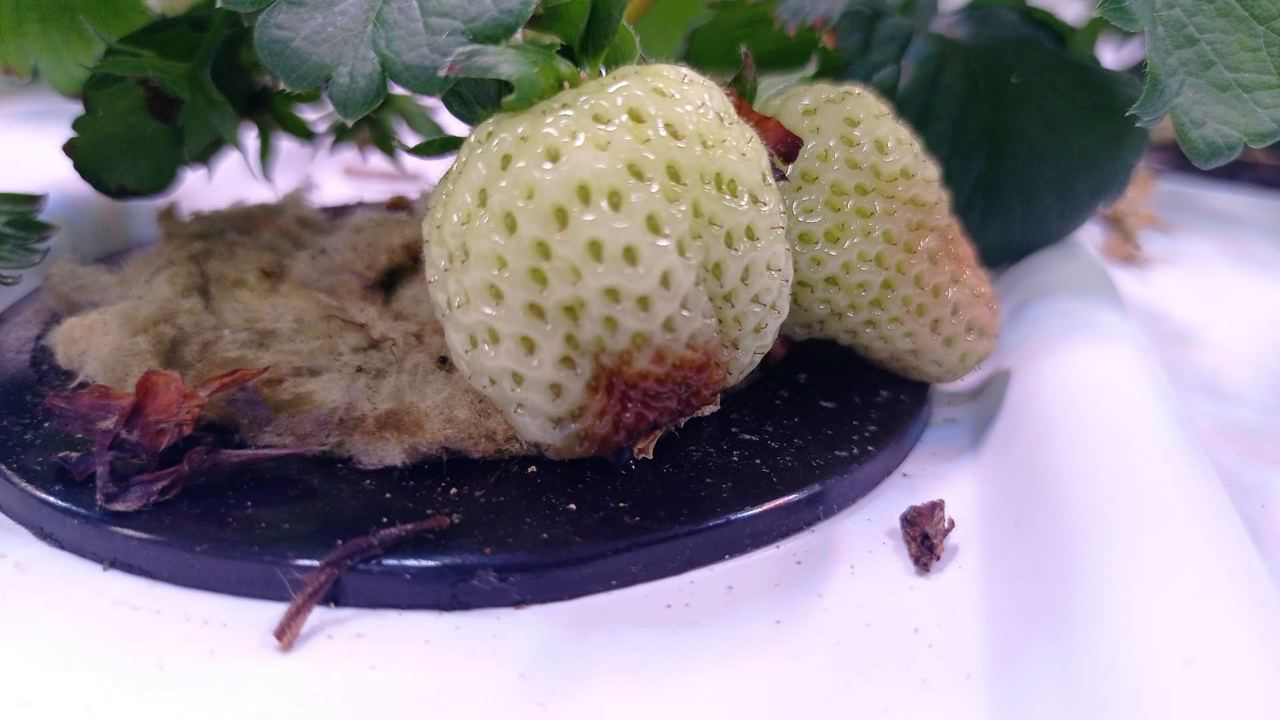

angular_leafspot               0.001 False
anthracnose_fruit_rot          0.008 False
blossom_blight                 0.000 False
gray_mold                      0.785 True
leaf_spot                      0.002 False
powdery_mildew_fruit           0.170 False
powdery_mildew_leaf            0.000 False


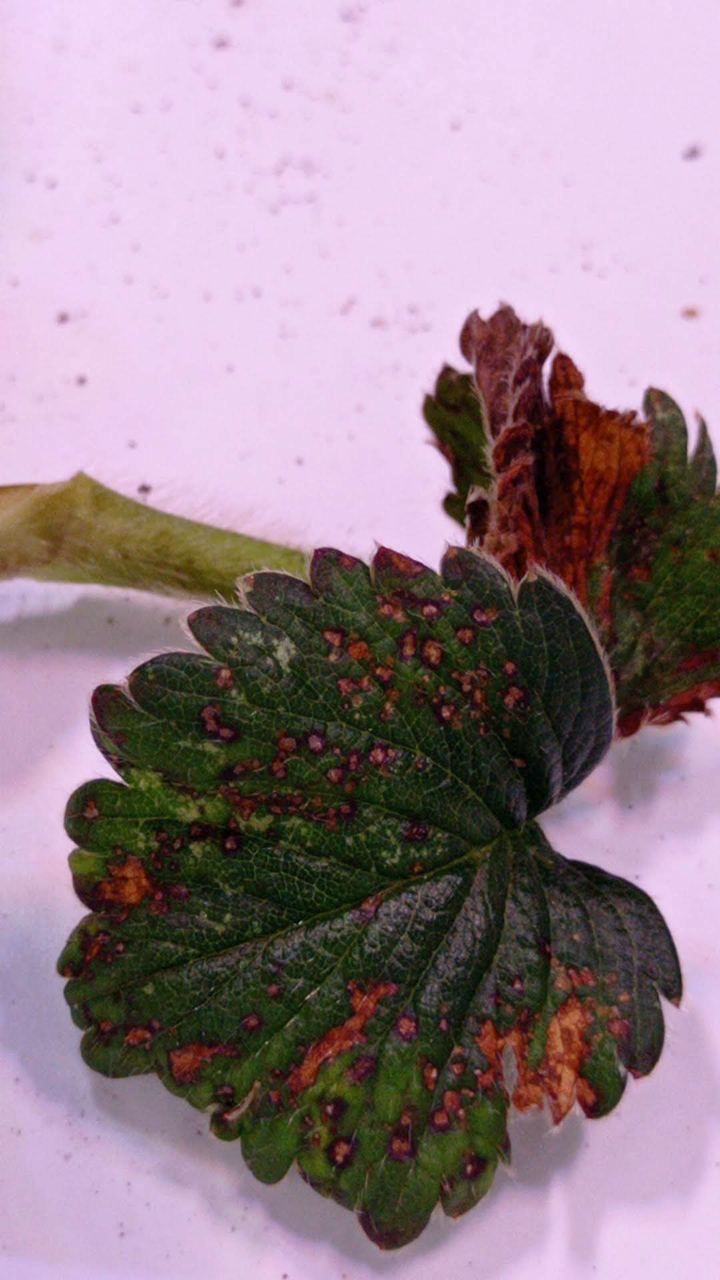

angular_leafspot               0.562 True
anthracnose_fruit_rot          0.047 False
blossom_blight                 0.001 False
gray_mold                      0.000 False
leaf_spot                      0.100 False
powdery_mildew_fruit           0.000 False
powdery_mildew_leaf            0.000 False


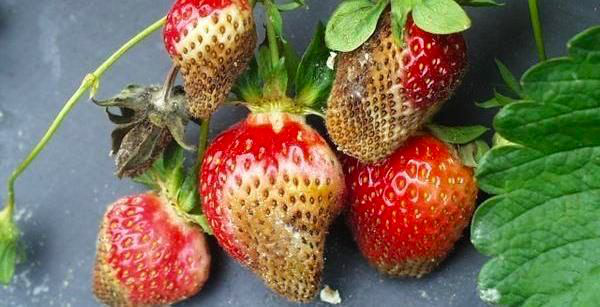

angular_leafspot               0.000 False
anthracnose_fruit_rot          0.002 False
blossom_blight                 0.000 False
gray_mold                      0.106 False
leaf_spot                      0.000 False
powdery_mildew_fruit           0.945 True
powdery_mildew_leaf            0.000 False


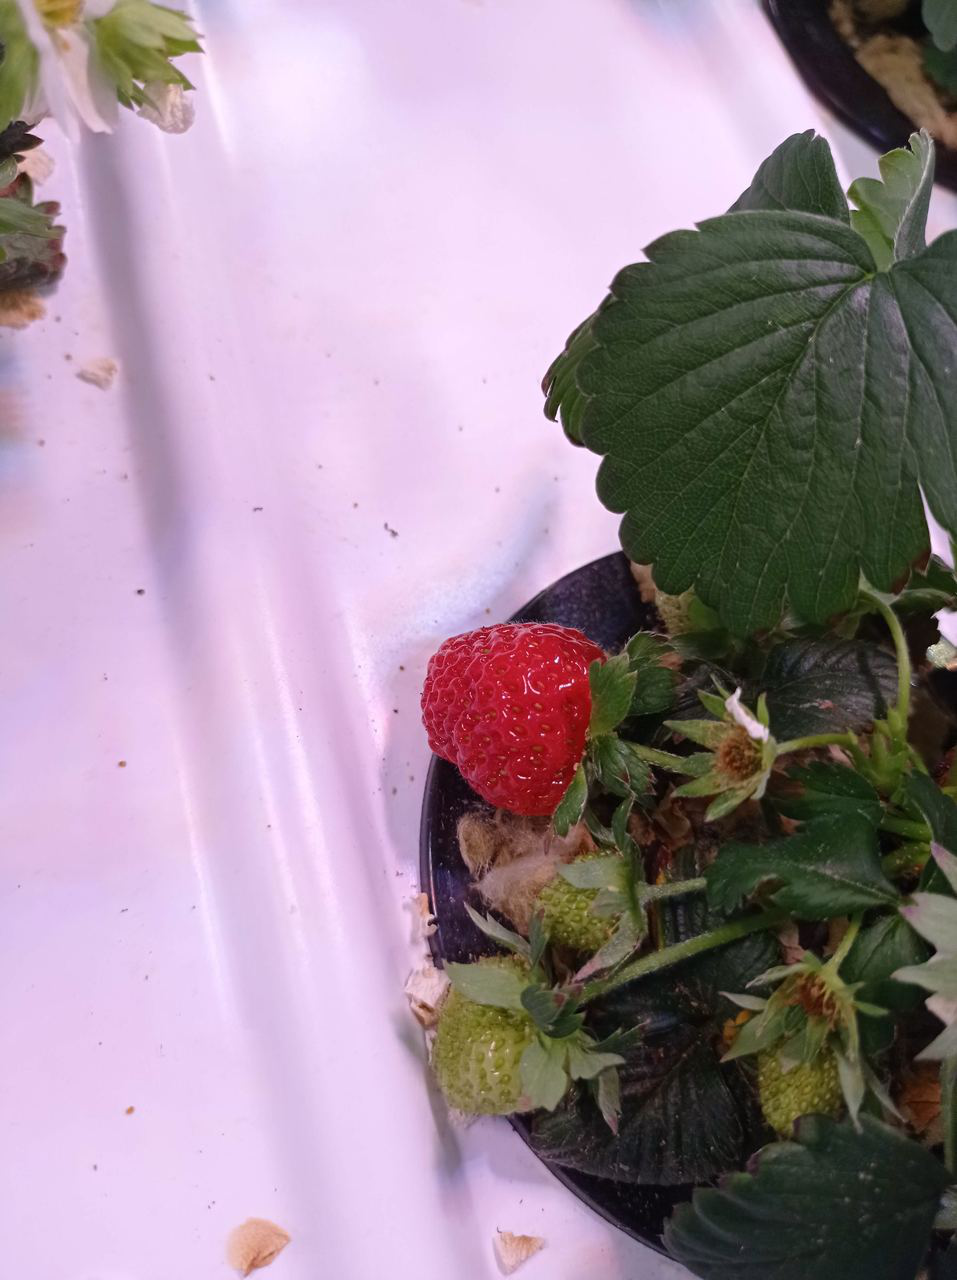

angular_leafspot               0.001 False
anthracnose_fruit_rot          0.024 False
blossom_blight                 0.002 False
gray_mold                      0.805 True
leaf_spot                      0.010 False
powdery_mildew_fruit           0.013 False
powdery_mildew_leaf            0.000 False


In [5]:
from PIL import Image


for f in [1, 2, 3, 4]:
    img = Image.open(f'images/pic{f}.jpg').convert('RGB')
    x = transforms.Compose([transforms.Resize((224, 224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])(img)
    with torch.no_grad():
        x = x[None]
        predict_proba = model(x)[0]
        predict_proba = torch.sigmoid(predict_proba).numpy()

    threshold = 0.5
    predict_target = (predict_proba > threshold)
    display(img)
    for cls, proba in zip(classes, predict_proba):
        print(f"{cls:<30s}", f"{proba:.3f}", proba > threshold)